Notebook used to investigate how mean squared error of best model changes with number of trees

Trees are at default depth (Max)
Utilizing entire dataset

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stat
import numpy as np 
#import forestsci
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter

import sys
sys.path.append("..")
import Utility.model_utils as model_utils

In [2]:
# Runtime Variables
number_trees = 0
seed = 72
min_leaf = 3
accuracy_array = []

# Data Input
filename = '../Results/training_data.csv'

# If saving model, set save to True and give meaningful name
#model_name = 'RF_C_MC.sav'
#save = False 


# Control what features are used by the model
label="Labels"
features=['area',
#        'equivalent_diameter', 
#        'orientation', 
    'major_axis_length',
    'minor_axis_length',
    'perimeter',
#        'min_intensity',
#        'mean_intensity',
        'max_intensity',
    'solidity',
    'major_axis_length/minor_axis_length',
    'perimeter/major_axis_length',
    'perimeter/minor_axis_length',
          'feret_diameter_max',
      'moments_hu-0',
      'moments_hu-1',
      'moments_hu-2',
      'moments_hu-3',
     # 'moments_hu-4',
      'moments_hu-5',
      #'moments_hu-6',
#    'eccentricity'
         ]


In [3]:
best_f1 = 0
best_model = None
for number_trees in np.arange(1,100,5):
    for # Read in data w/ features
    df = pd.read_csv(filename)

    # Modify Data (Remove illegal data OR set different runtime)

    
    # Change how data is grouped
    #df['Labels'].replace('Poorly Segmented', 'Incomplete', inplace=True) # Group Poorly Segmented and Incomplete as a single class
    df['Labels'].replace('Multiple Crystal', 'Crystal', inplace=True) # Group Multiple Crystal and Crystal as a single class
    #df = df[df['Labels'] != "Incomplete"] # Remove any data labeled as "Incomplete"
    df = df[df['Labels'] != "Crystal"]
    
    # Missed Labels: Purge any bad data that the model cannot run on
    df['Labels'].replace('', np.nan, inplace=True) 
    df.dropna(subset=['Labels'], inplace=True)
    # Numerical errors (divide by 0)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    for feature in features:
        df.dropna(subset=[feature],inplace=True)

    # Split Data
    X=df[features]
    y=df[label]
    
    print(Counter(y))

    # Encode
    ohe = OneHotEncoder(sparse=False)
    y = ohe.fit_transform(df[[label]])

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

    # Create RandomForestRegressor
    rfr=RandomForestRegressor(n_estimators = number_trees,min_samples_leaf=min_leaf, oob_score=False)
    rfr.fit(X_train,y_train)

    # Accuracy Checks
    y_pred=rfr.predict(X_test)
    y_pred = np.round(y_pred)
    
    accuracy = metrics.f1_score(y_test,y_pred,average='macro')
    accuracy_array.append(accuracy)
    #accuracy = metrics.accuracy_score(y_test,y_pred)
    print(f'{seed} Seed Completed')
    model_utils.success_of_guess(y_pred,y_test,ohe)
    print(f'Running Average F1: {np.average(accuracy_array)}, OOB Score: N/A')
    
    if accuracy > best_f1:
        best_model = rfr
        best_f1 = accuracy

Counter({'Incomplete': 210, 'Poorly Segmented': 203})
0 Seed Completed
Labels_Incomplete -> Precision = 0.6326530612244898, Recall = 0.7045454545454546, F1 = 0.6666666666666666
Labels_Poorly Segmented -> Precision = 0.6176470588235294, Recall = 0.5384615384615384, F1 = 0.5753424657534247
Run Accuracy : 0.6265060240963856
Running Average F1: 0.6210045662100456, OOB Score: N/A
Counter({'Incomplete': 210, 'Poorly Segmented': 203})
1 Seed Completed
Labels_Incomplete -> Precision = 0.6363636363636364, Recall = 0.6363636363636364, F1 = 0.6363636363636364
Labels_Poorly Segmented -> Precision = 0.76, Recall = 0.76, F1 = 0.76
Run Accuracy : 0.7108433734939759
Running Average F1: 0.6595931921959319, OOB Score: N/A
Counter({'Incomplete': 210, 'Poorly Segmented': 203})
2 Seed Completed
Labels_Incomplete -> Precision = 0.7333333333333333, Recall = 0.46808510638297873, F1 = 0.5714285714285714
Labels_Poorly Segmented -> Precision = 0.5283018867924528, Recall = 0.7777777777777778, F1 = 0.6292134831460

23 Seed Completed
Labels_Incomplete -> Precision = 0.7, Recall = 0.6086956521739131, F1 = 0.6511627906976744
Labels_Poorly Segmented -> Precision = 0.5813953488372093, Recall = 0.6756756756756757, F1 = 0.6250000000000001
Run Accuracy : 0.6385542168674698
Running Average F1: 0.6500132851933567, OOB Score: N/A
Counter({'Incomplete': 210, 'Poorly Segmented': 203})
24 Seed Completed
Labels_Incomplete -> Precision = 0.75, Recall = 0.7674418604651163, F1 = 0.7586206896551724
Labels_Poorly Segmented -> Precision = 0.7435897435897436, Recall = 0.725, F1 = 0.7341772151898733
Run Accuracy : 0.7469879518072289
Running Average F1: 0.6538687118825233, OOB Score: N/A
Counter({'Incomplete': 210, 'Poorly Segmented': 203})
25 Seed Completed
Labels_Incomplete -> Precision = 0.6341463414634146, Recall = 0.7027027027027027, F1 = 0.6666666666666667
Labels_Poorly Segmented -> Precision = 0.7380952380952381, Recall = 0.6739130434782609, F1 = 0.7045454545454546
Run Accuracy : 0.6867469879518072
Running Averag

46 Seed Completed
Labels_Incomplete -> Precision = 0.6222222222222222, Recall = 0.7, F1 = 0.6588235294117647
Labels_Poorly Segmented -> Precision = 0.6842105263157895, Recall = 0.6046511627906976, F1 = 0.6419753086419753
Run Accuracy : 0.6506024096385542
Running Average F1: 0.6531597060891076, OOB Score: N/A
Counter({'Incomplete': 210, 'Poorly Segmented': 203})
47 Seed Completed
Labels_Incomplete -> Precision = 0.5675675675675675, Recall = 0.5833333333333334, F1 = 0.5753424657534246
Labels_Poorly Segmented -> Precision = 0.6739130434782609, Recall = 0.6595744680851063, F1 = 0.6666666666666667
Run Accuracy : 0.6265060240963856
Running Average F1: 0.6524898073416272, OOB Score: N/A
Counter({'Incomplete': 210, 'Poorly Segmented': 203})
48 Seed Completed
Labels_Incomplete -> Precision = 0.5172413793103449, Recall = 0.39473684210526316, F1 = 0.44776119402985076
Labels_Poorly Segmented -> Precision = 0.5740740740740741, Recall = 0.6888888888888889, F1 = 0.6262626262626262
Run Accuracy : 0.55

Counter({'Incomplete': 210, 'Poorly Segmented': 203})
70 Seed Completed
Labels_Incomplete -> Precision = 0.5833333333333334, Recall = 0.5526315789473685, F1 = 0.5675675675675677
Labels_Poorly Segmented -> Precision = 0.6382978723404256, Recall = 0.6666666666666666, F1 = 0.6521739130434782
Run Accuracy : 0.6144578313253012
Running Average F1: 0.6483446231381228, OOB Score: N/A
Counter({'Incomplete': 210, 'Poorly Segmented': 203})
71 Seed Completed
Labels_Incomplete -> Precision = 0.5384615384615384, Recall = 0.5833333333333334, F1 = 0.5599999999999999
Labels_Poorly Segmented -> Precision = 0.6590909090909091, Recall = 0.6170212765957447, F1 = 0.6373626373626374
Run Accuracy : 0.6024096385542169
Running Average F1: 0.6476548550206672, OOB Score: N/A
Counter({'Incomplete': 210, 'Poorly Segmented': 203})
72 Seed Completed
Labels_Incomplete -> Precision = 0.6585365853658537, Recall = 0.675, F1 = 0.6666666666666667
Labels_Poorly Segmented -> Precision = 0.6904761904761905, Recall = 0.6744186

93 Seed Completed
Labels_Incomplete -> Precision = 0.7352941176470589, Recall = 0.625, F1 = 0.6756756756756757
Labels_Poorly Segmented -> Precision = 0.6938775510204082, Recall = 0.7906976744186046, F1 = 0.7391304347826086
Run Accuracy : 0.7108433734939759
Running Average F1: 0.6533313593519877, OOB Score: N/A
Counter({'Incomplete': 210, 'Poorly Segmented': 203})
94 Seed Completed
Labels_Incomplete -> Precision = 0.6129032258064516, Recall = 0.475, F1 = 0.5352112676056339
Labels_Poorly Segmented -> Precision = 0.5961538461538461, Recall = 0.7209302325581395, F1 = 0.6526315789473683
Run Accuracy : 0.6024096385542169
Running Average F1: 0.6527059916038246, OOB Score: N/A
Counter({'Incomplete': 210, 'Poorly Segmented': 203})
95 Seed Completed
Labels_Incomplete -> Precision = 0.7317073170731707, Recall = 0.6382978723404256, F1 = 0.6818181818181819
Labels_Poorly Segmented -> Precision = 0.5952380952380952, Recall = 0.6944444444444444, F1 = 0.6410256410256411
Run Accuracy : 0.662650602409638

In [4]:
print(f'Best Model F1: {best_f1}')
#print(best_model.oob_score_)
print(best_model.score(X_test,y_test))
print(ohe)
print(ohe.feature_names_in_)
ohe.get_feature_names_out(['Labels'])

Best Model F1: 0.7590011614401858
0.6858353736634994
OneHotEncoder(sparse=False)
['Labels']


array(['Labels_Incomplete', 'Labels_Poorly Segmented'], dtype=object)

In [5]:
# Feature Importances

from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(best_model, X_test, y_test, n_repeats=20, random_state=seed, n_jobs=4)
elapsed_time = time.time() - start_time

print(f'Time elapsed: {elapsed_time}')
forest_importances = pd.Series(result.importances_mean, index=features)

Time elapsed: 1.3882555961608887


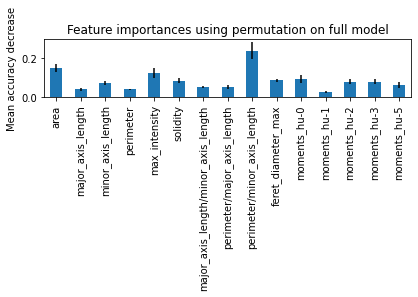

In [6]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [7]:
import pickle
if save:
    pickle.dump(best_model, open(model_name, 'wb'))